In [98]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore") #:D

# Read the CSV file
all_data = pd.read_csv("weather_historic_data_.csv")

### Note - columns:

valid:
timestamp of the observation - every half hour

tmpf:
Air Temperature in Fahrenheit

relh:
Relative Humidity in %

drct:
Wind Direction in degrees from *true* north

sknt:
Wind Speed in knots

p01i:
One hour precipitation for the period from the observation time to the time of the previous hourly precipitation reset. This varies slightly by site. Values are in inches. This value may or may not contain frozen precipitation melted by some device on the sensor or estimated by some other means. Unfortunately, we do not know of an authoritative database denoting which station has which sensor.



In [99]:
df_with_direct = all_data[["valid", "tmpf", "relh", "drct", "sknt","p01i"]]

df_with_direct=df_with_direct.replace('M', pd.np.nan)

nan_count = df_with_direct.isna().sum()

print(nan_count)

valid       0
tmpf        3
relh        3
drct     3491
sknt        1
p01i        0
dtype: int64


In [100]:
# drct deletion
df = df_with_direct.copy()
df.drop('drct',axis='columns', inplace=True)

# 'tmpf' NaN into data from previous timestamp
bool_df = df['tmpf'].isnull()
indexes = df[bool_df].index
for i in indexes:
    df['tmpf'][i]=df['tmpf'][i-1]

# 'tmpf' NaN into data from previous timestamp
bool_df = df['relh'].isnull()
indexes = df[bool_df].index
for i in indexes:
    df['relh'][i]=df['relh'][i-1]

# 'tmpf' NaN into data from previous timestamp
bool_df = df['sknt'].isnull()
indexes = df[bool_df].index
for i in indexes:
    df['sknt'][i]=df['sknt'][i-1]

nan_count = df.isna().sum()

print(nan_count)

valid    0
tmpf     0
relh     0
sknt     0
p01i     0
dtype: int64


In [101]:
#Fahrenheit => Celsius

df['tmpf'] = df['tmpf'].astype(float)
df = df.assign(temp = lambda x: (5/9)*(x['tmpf']-32))
df.drop('tmpf',axis='columns', inplace=True)

# date
df['valid']=pd.to_datetime(df['valid'])
df['day'] = df['valid'].dt.day
df['month'] = df['valid'].dt.month
df['year'] = df['valid'].dt.year
df['time'] = df['valid'].dt.time

df.drop('valid',axis='columns', inplace=True)


df.head()

,relh,sknt,p01i,temp,day,month,year,time
0,93.03,13.0,0.0,1.0,1,1,2020,00:00:00
1,100.00,12.0,0.0,1.0,1,1,2020,00:30:00
2,100.00,12.0,0.0,1.0,1,1,2020,01:00:00
3,93.03,11.0,0.0,1.0,1,1,2020,01:30:00
4,93.03,11.0,0.0,1.0,1,1,2020,02:00:00


Only for temperature:

In [102]:
temp = df['temp'].values

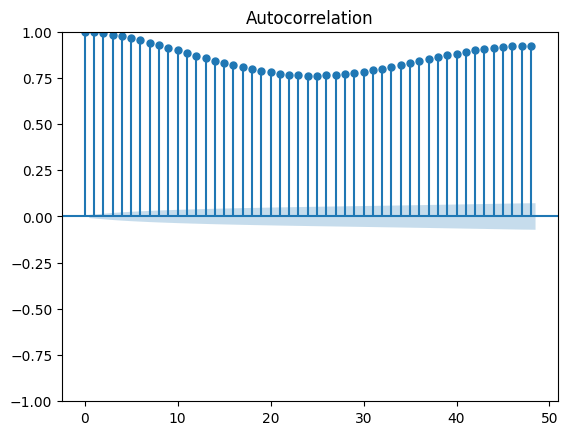

In [103]:
plot_acf(temp, lags = 48)
pyplot.show()

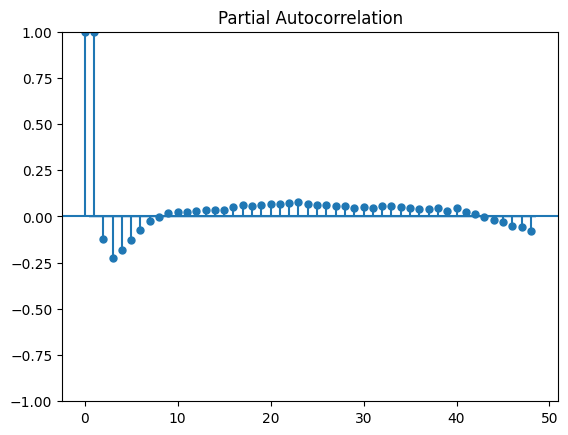

In [104]:
plot_pacf(temp, lags=48)
pyplot.show()

### Correlations in data

          temp      relh      sknt
temp  1.000000 -0.474830 -0.046237
relh -0.474830  1.000000 -0.146239
sknt -0.046237 -0.146239  1.000000


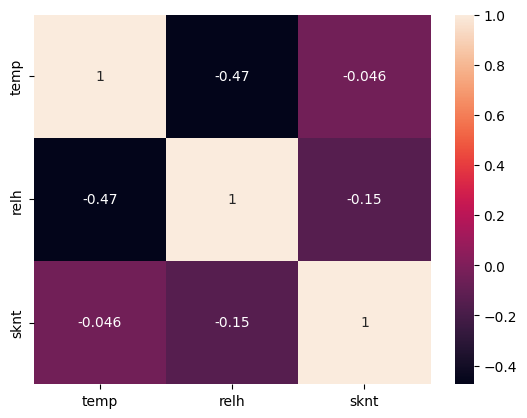

In [115]:
df_no_date= df[["temp","relh", "sknt"]]
df_no_date=df_no_date.apply(lambda x: pd.to_numeric(x, errors='ignore'))
df_no_date.head()
corr_matrix  = df_no_date.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

### Plot for precipitaion - 0?

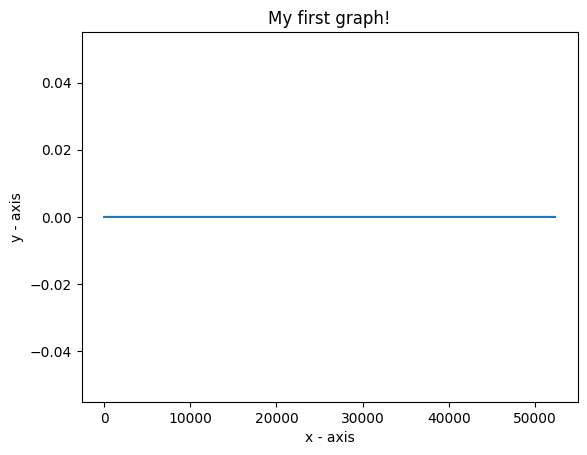

In [117]:
# data plot precipitation - 0??????
# plotting the points  
plt.plot(df['p01i']) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('My first graph!') 
  
# function to show the plot 
plt.show() 